In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.dpi']=300
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
df.duplicated().sum()

0

In [8]:
df['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [6]:
df[df['animal name'] == 'frog']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [9]:
# change the venomous one into frog2 to seperate 2 kinds of frog 

In [10]:
df['animal name'][(df['venomous'] == 1 )& (df['animal name'] == 'frog')] = "frog2"

In [11]:
df['animal name'].value_counts()

aardvark    1
polecat     1
seal        1
seahorse    1
scorpion    1
           ..
goat        1
gnat        1
girl        1
giraffe     1
wren        1
Name: animal name, Length: 101, dtype: int64

In [12]:
# finding Unique value of hair
hair_color = [("brown" if i == 1 else "black" if i == 0 else "white" ) for i in df.hair]
unique_color = list(set(hair_color))
unique_color

['black', 'brown']

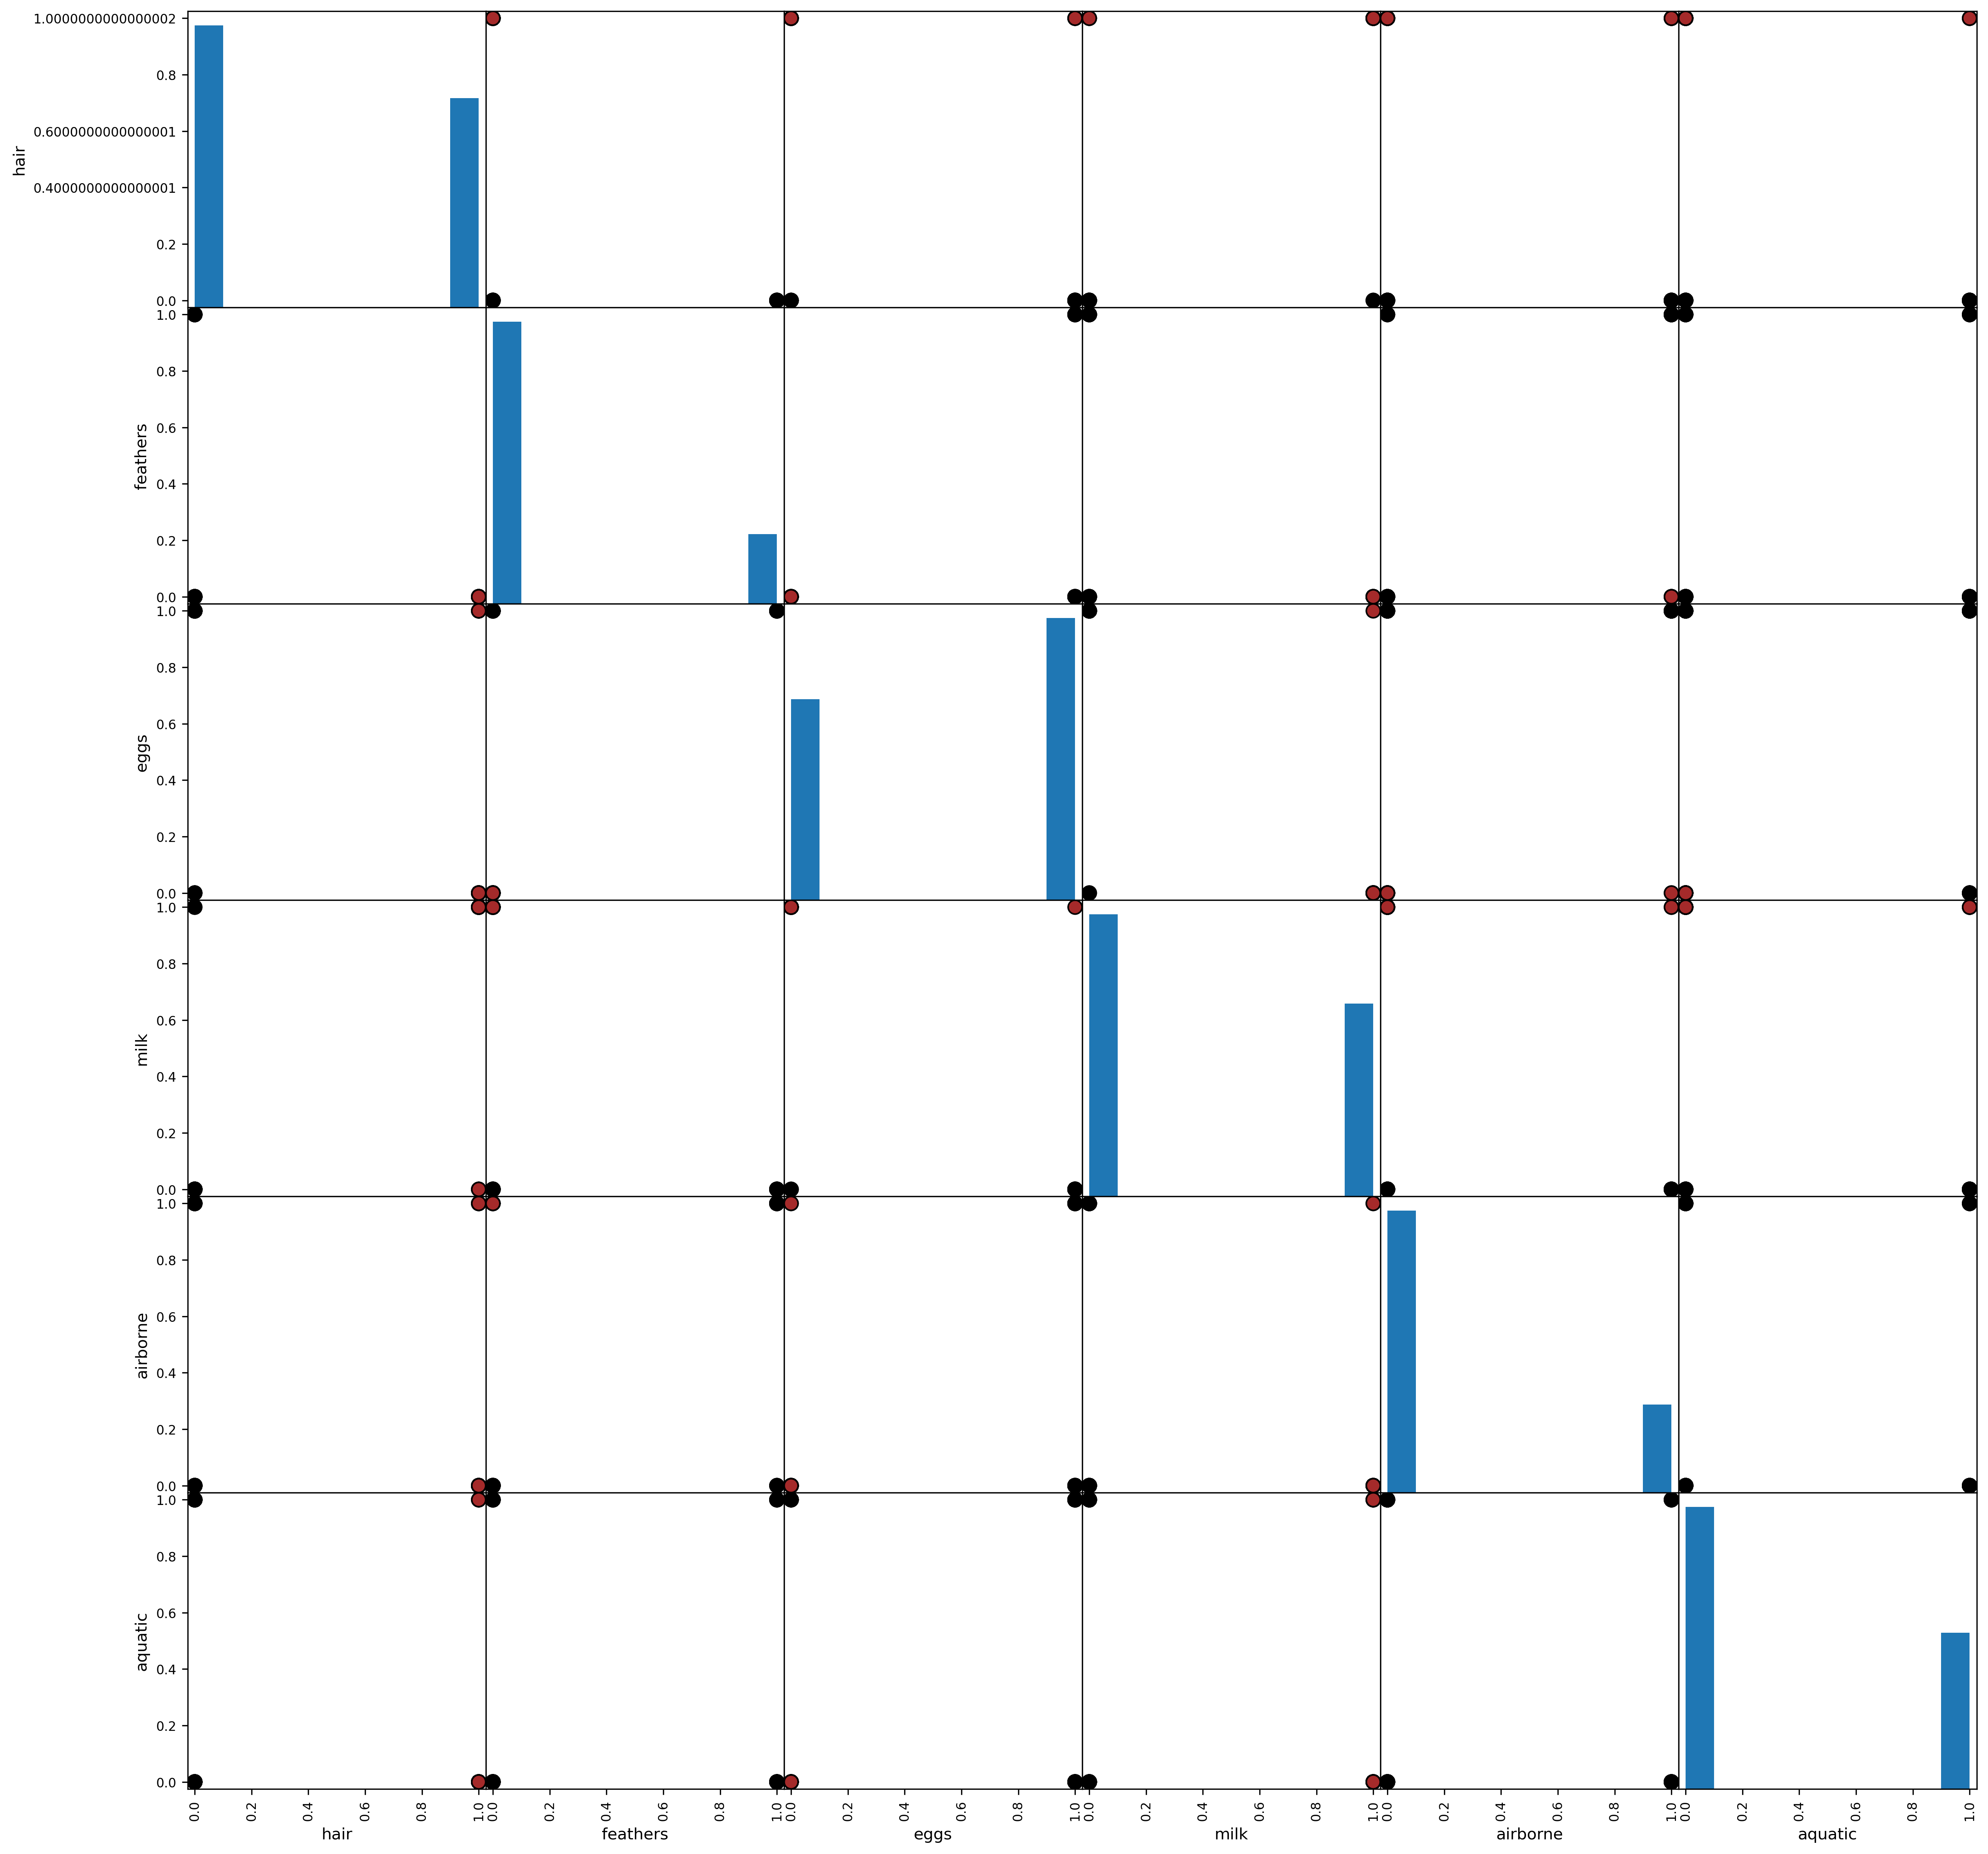

In [13]:
# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(df.iloc[:,:7],
                                       c=hair_color,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

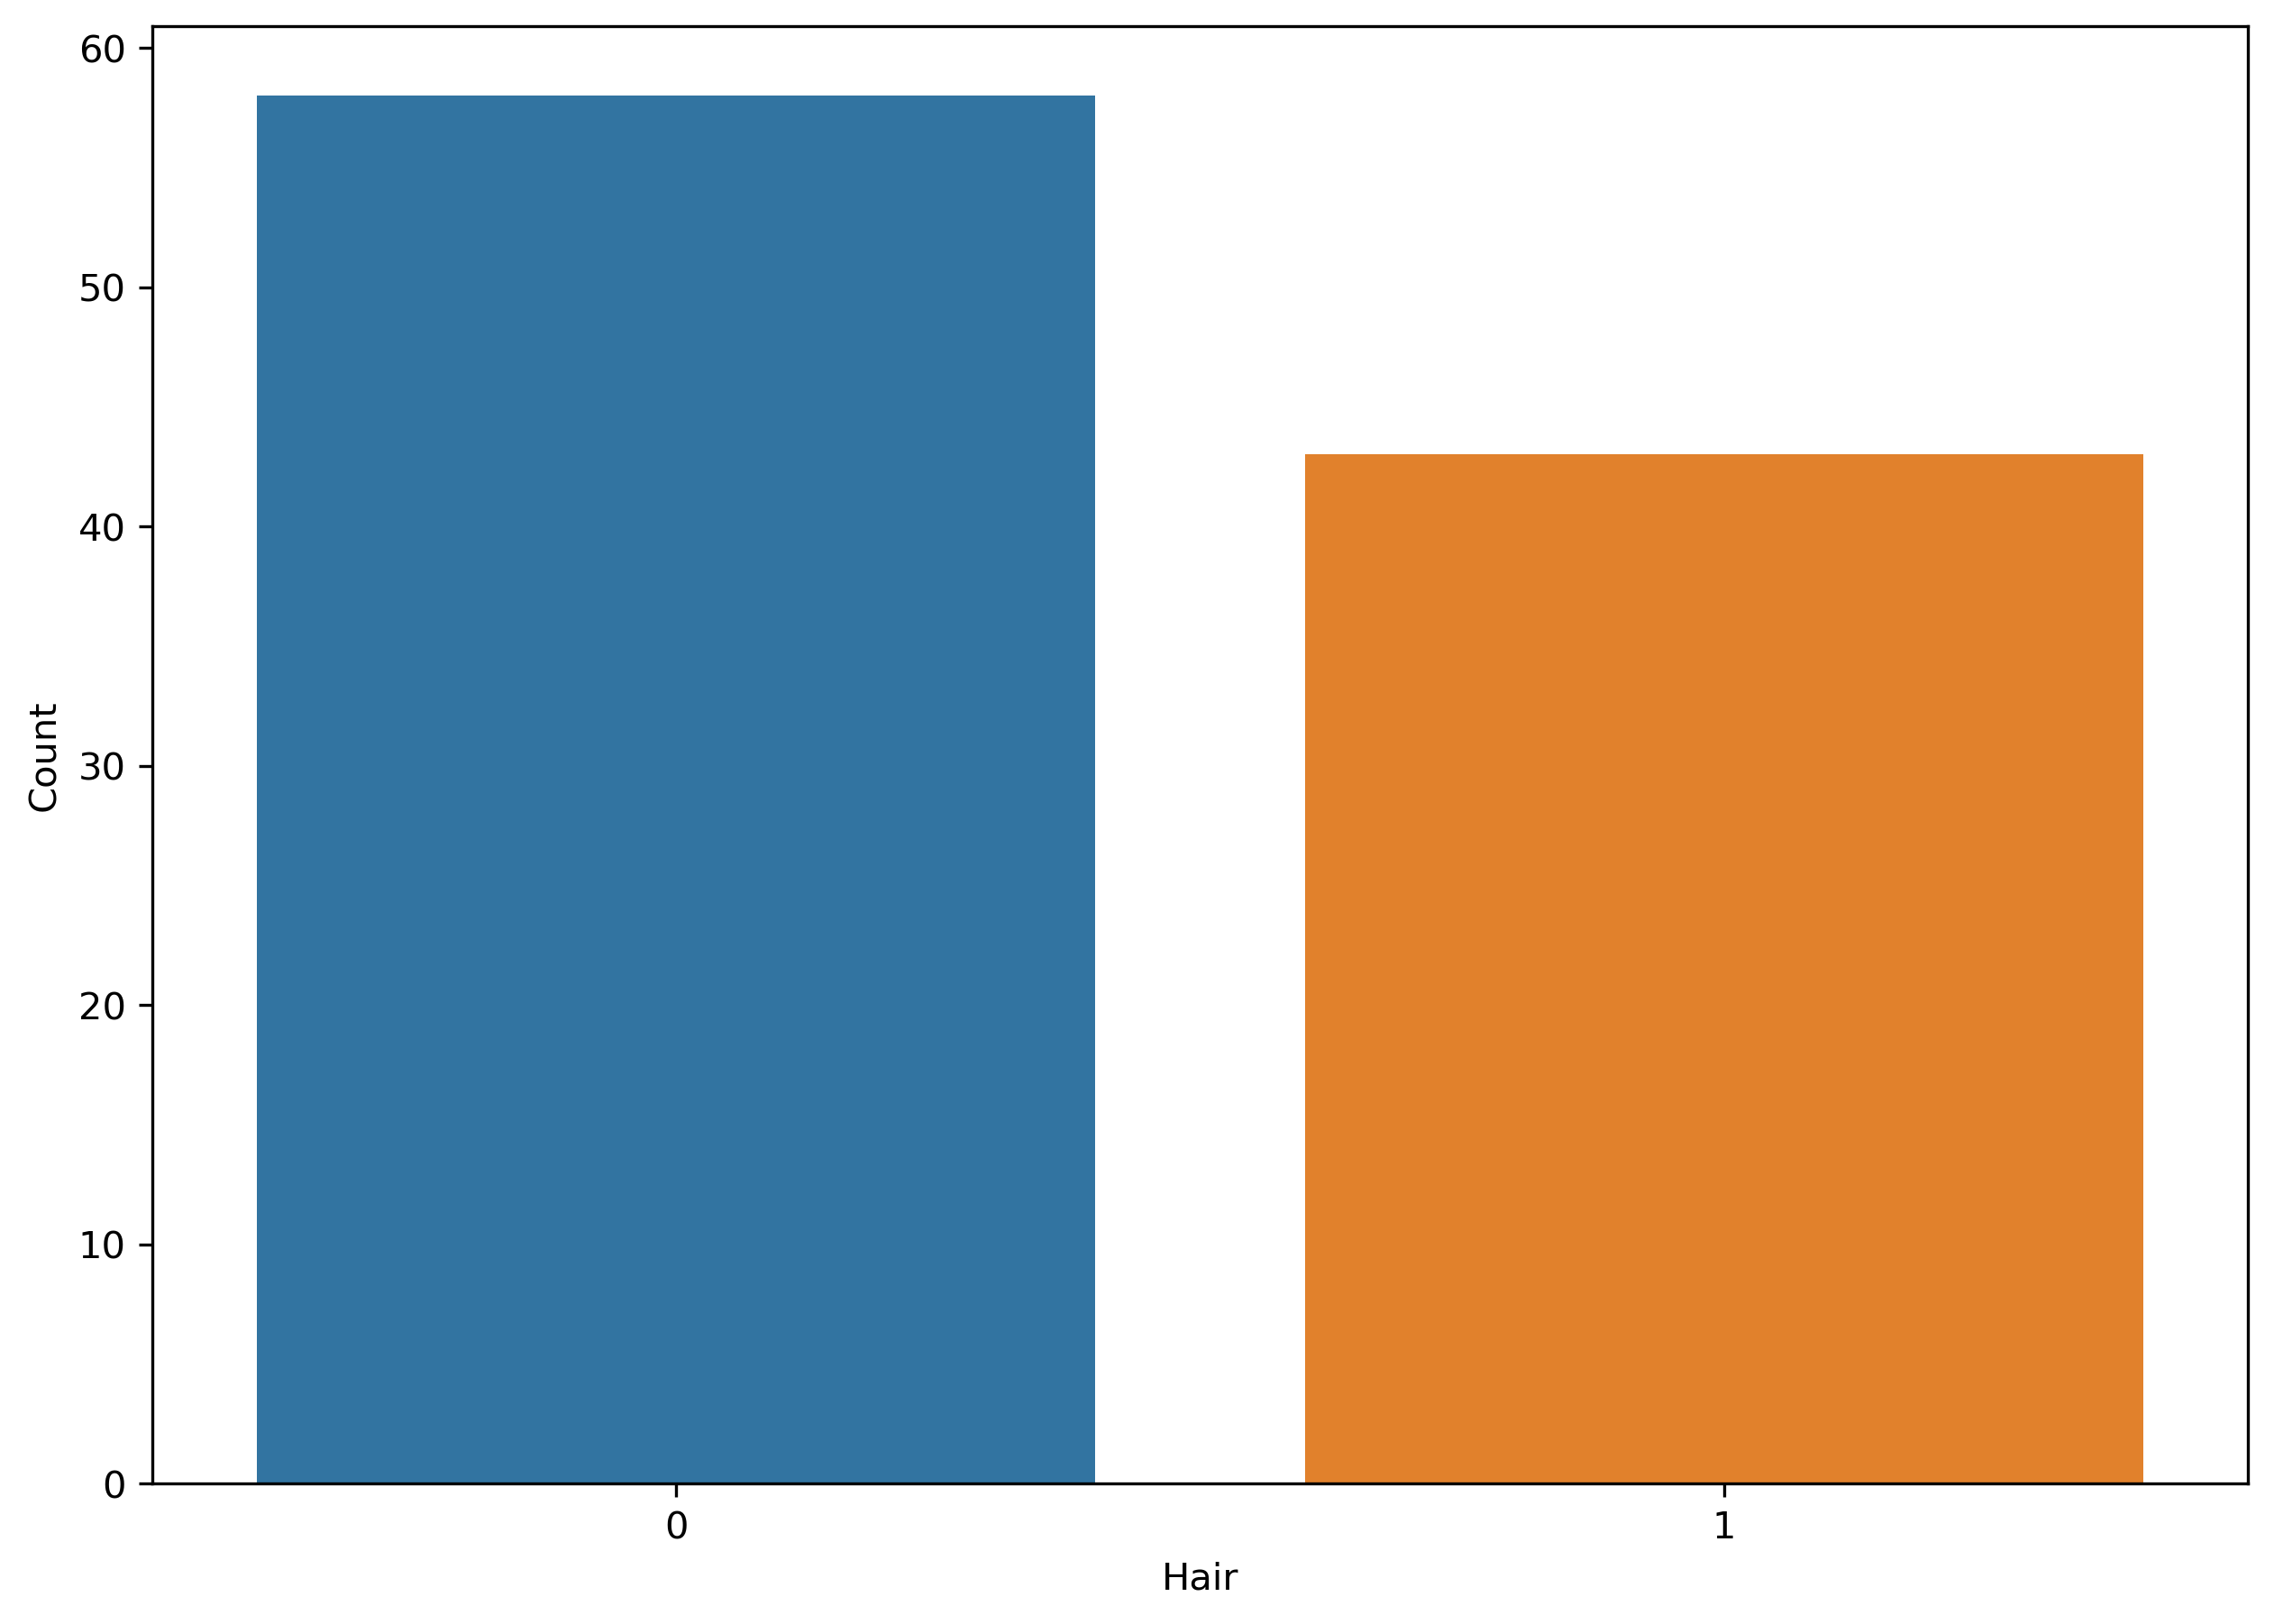

0    58
1    43
Name: hair, dtype: int64

In [14]:
sns.countplot(x="hair", data=df)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
df.loc[:,'hair'].value_counts()

[]

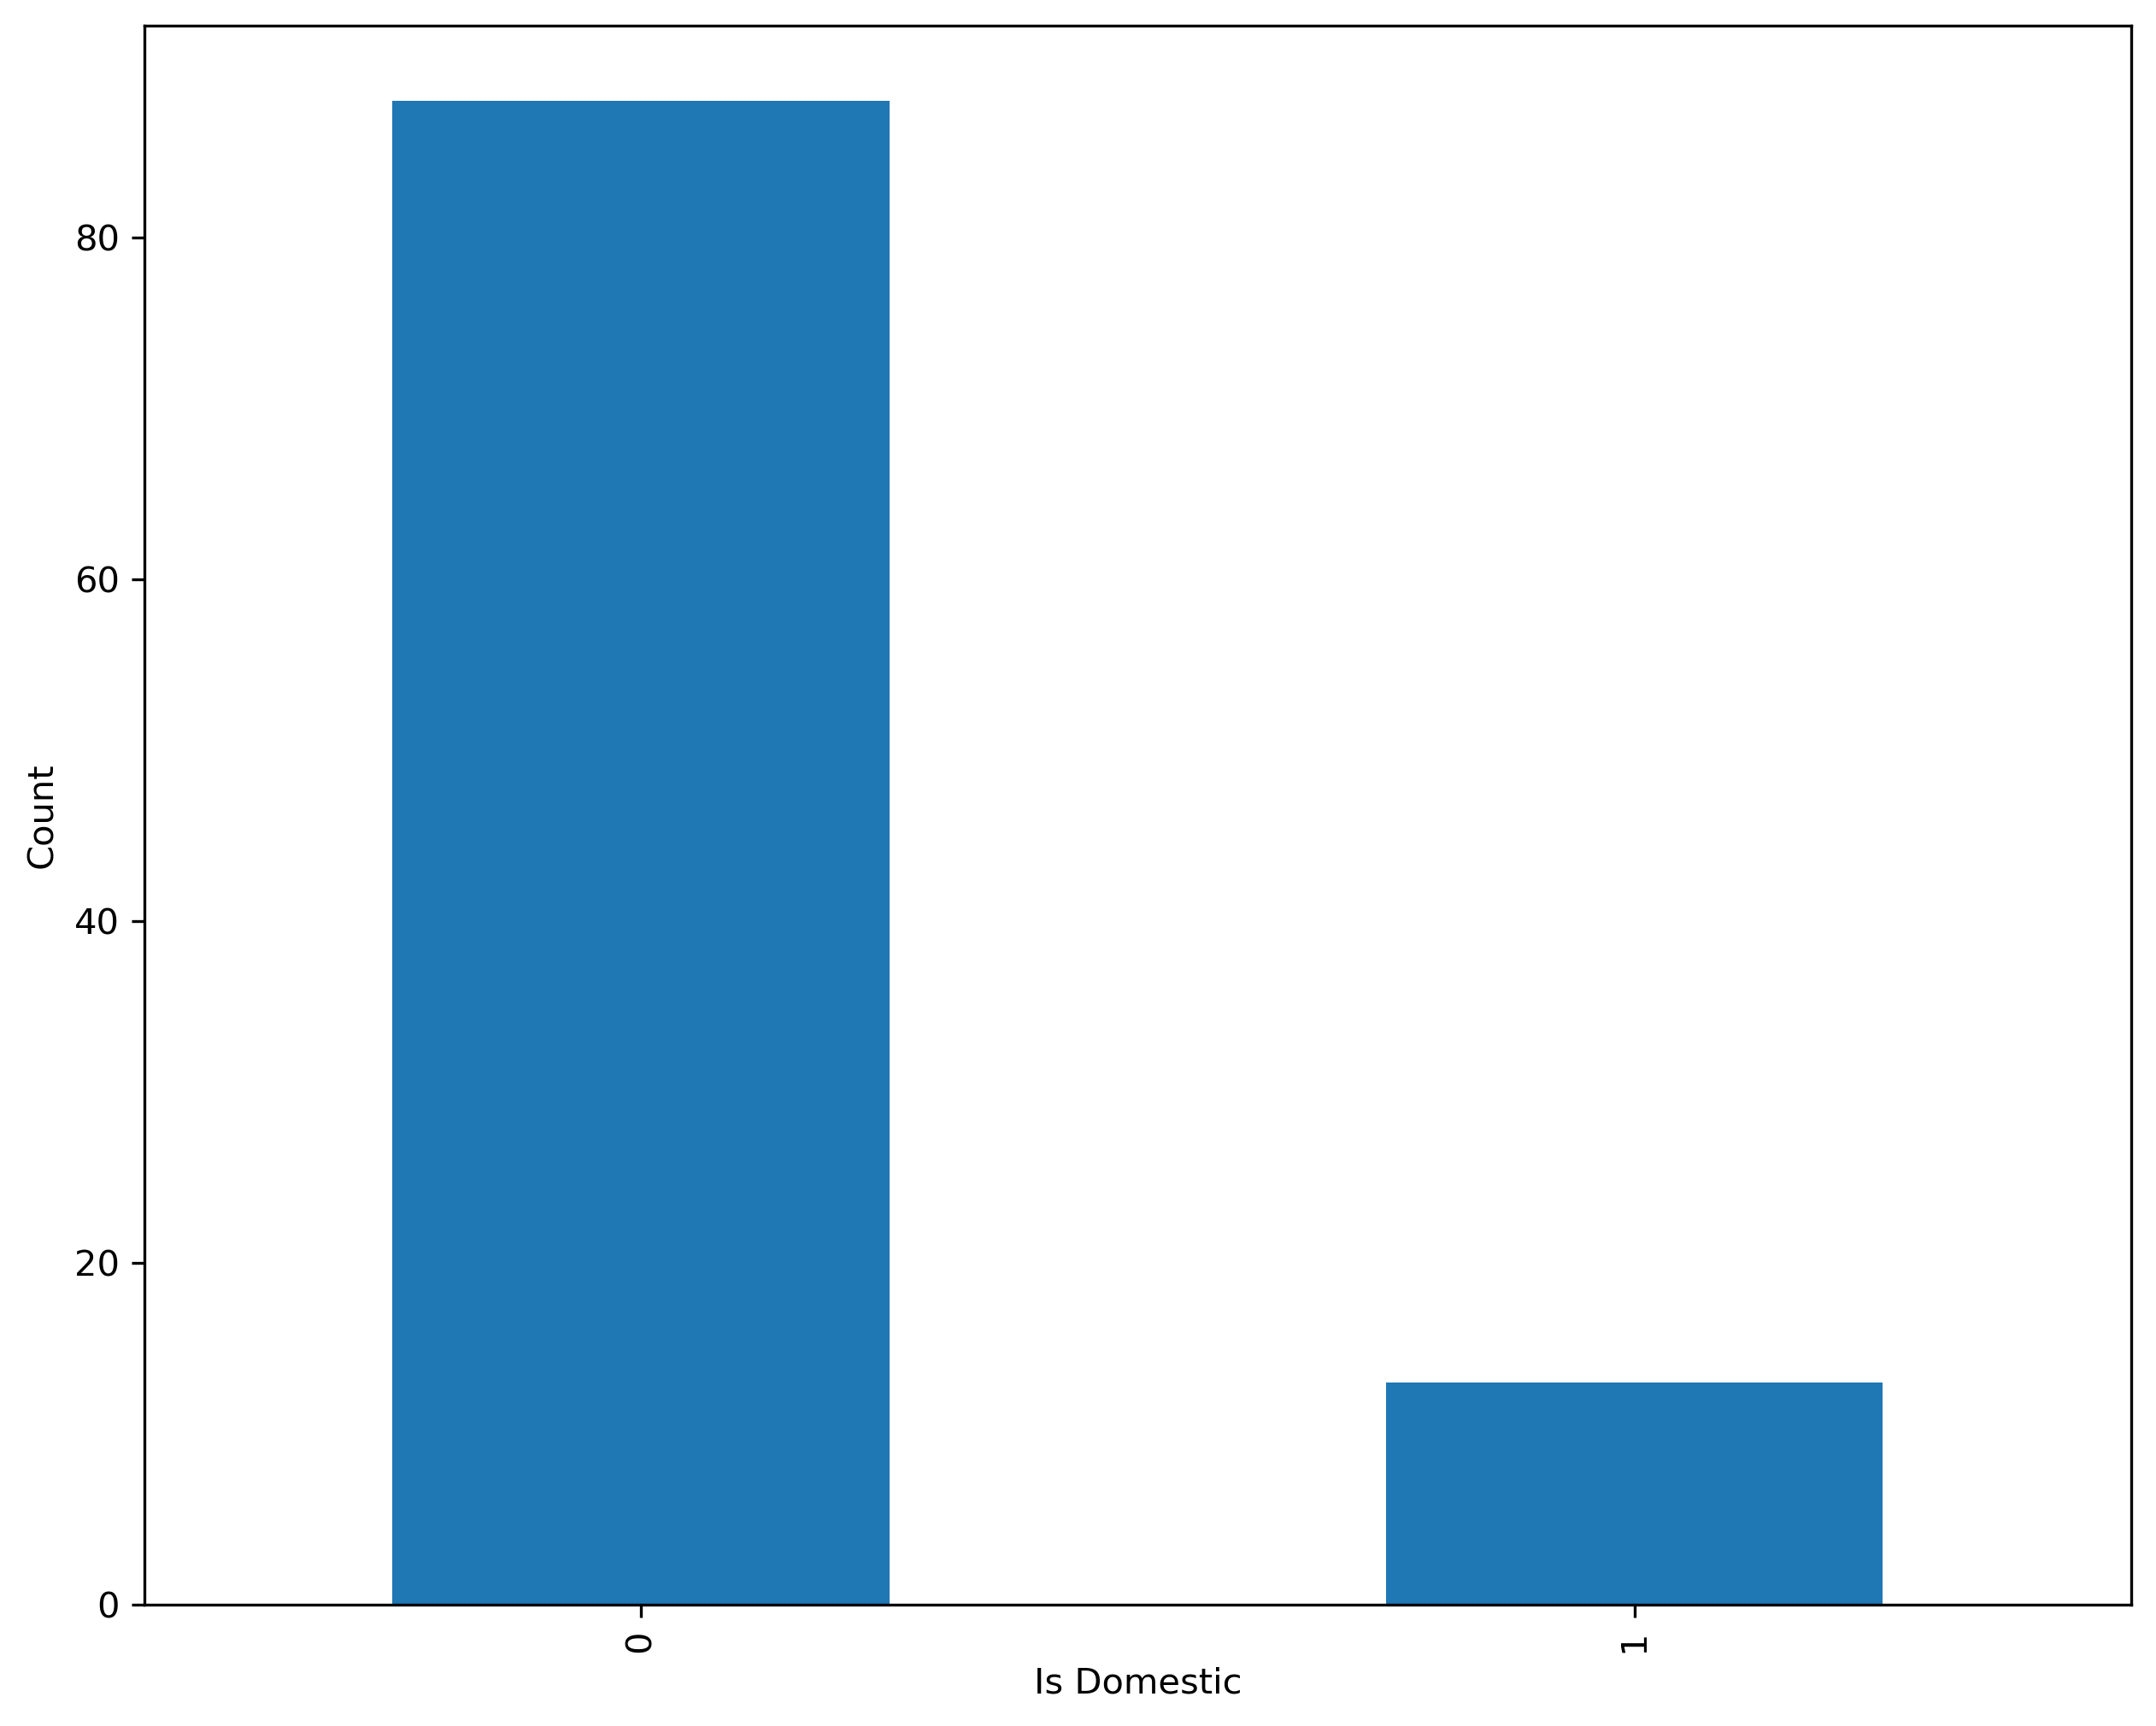

In [15]:
# Lets plot how many animals are domestic or not
plt.figure(figsize=(10,8));
df['domestic'].value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot()

In [ ]:
# So we can see mostly animals are not domestic.

In [16]:
pd.crosstab(df['type'], df['domestic'])

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


In [ ]:
# Lets see species wise domestic and non-domestic animals

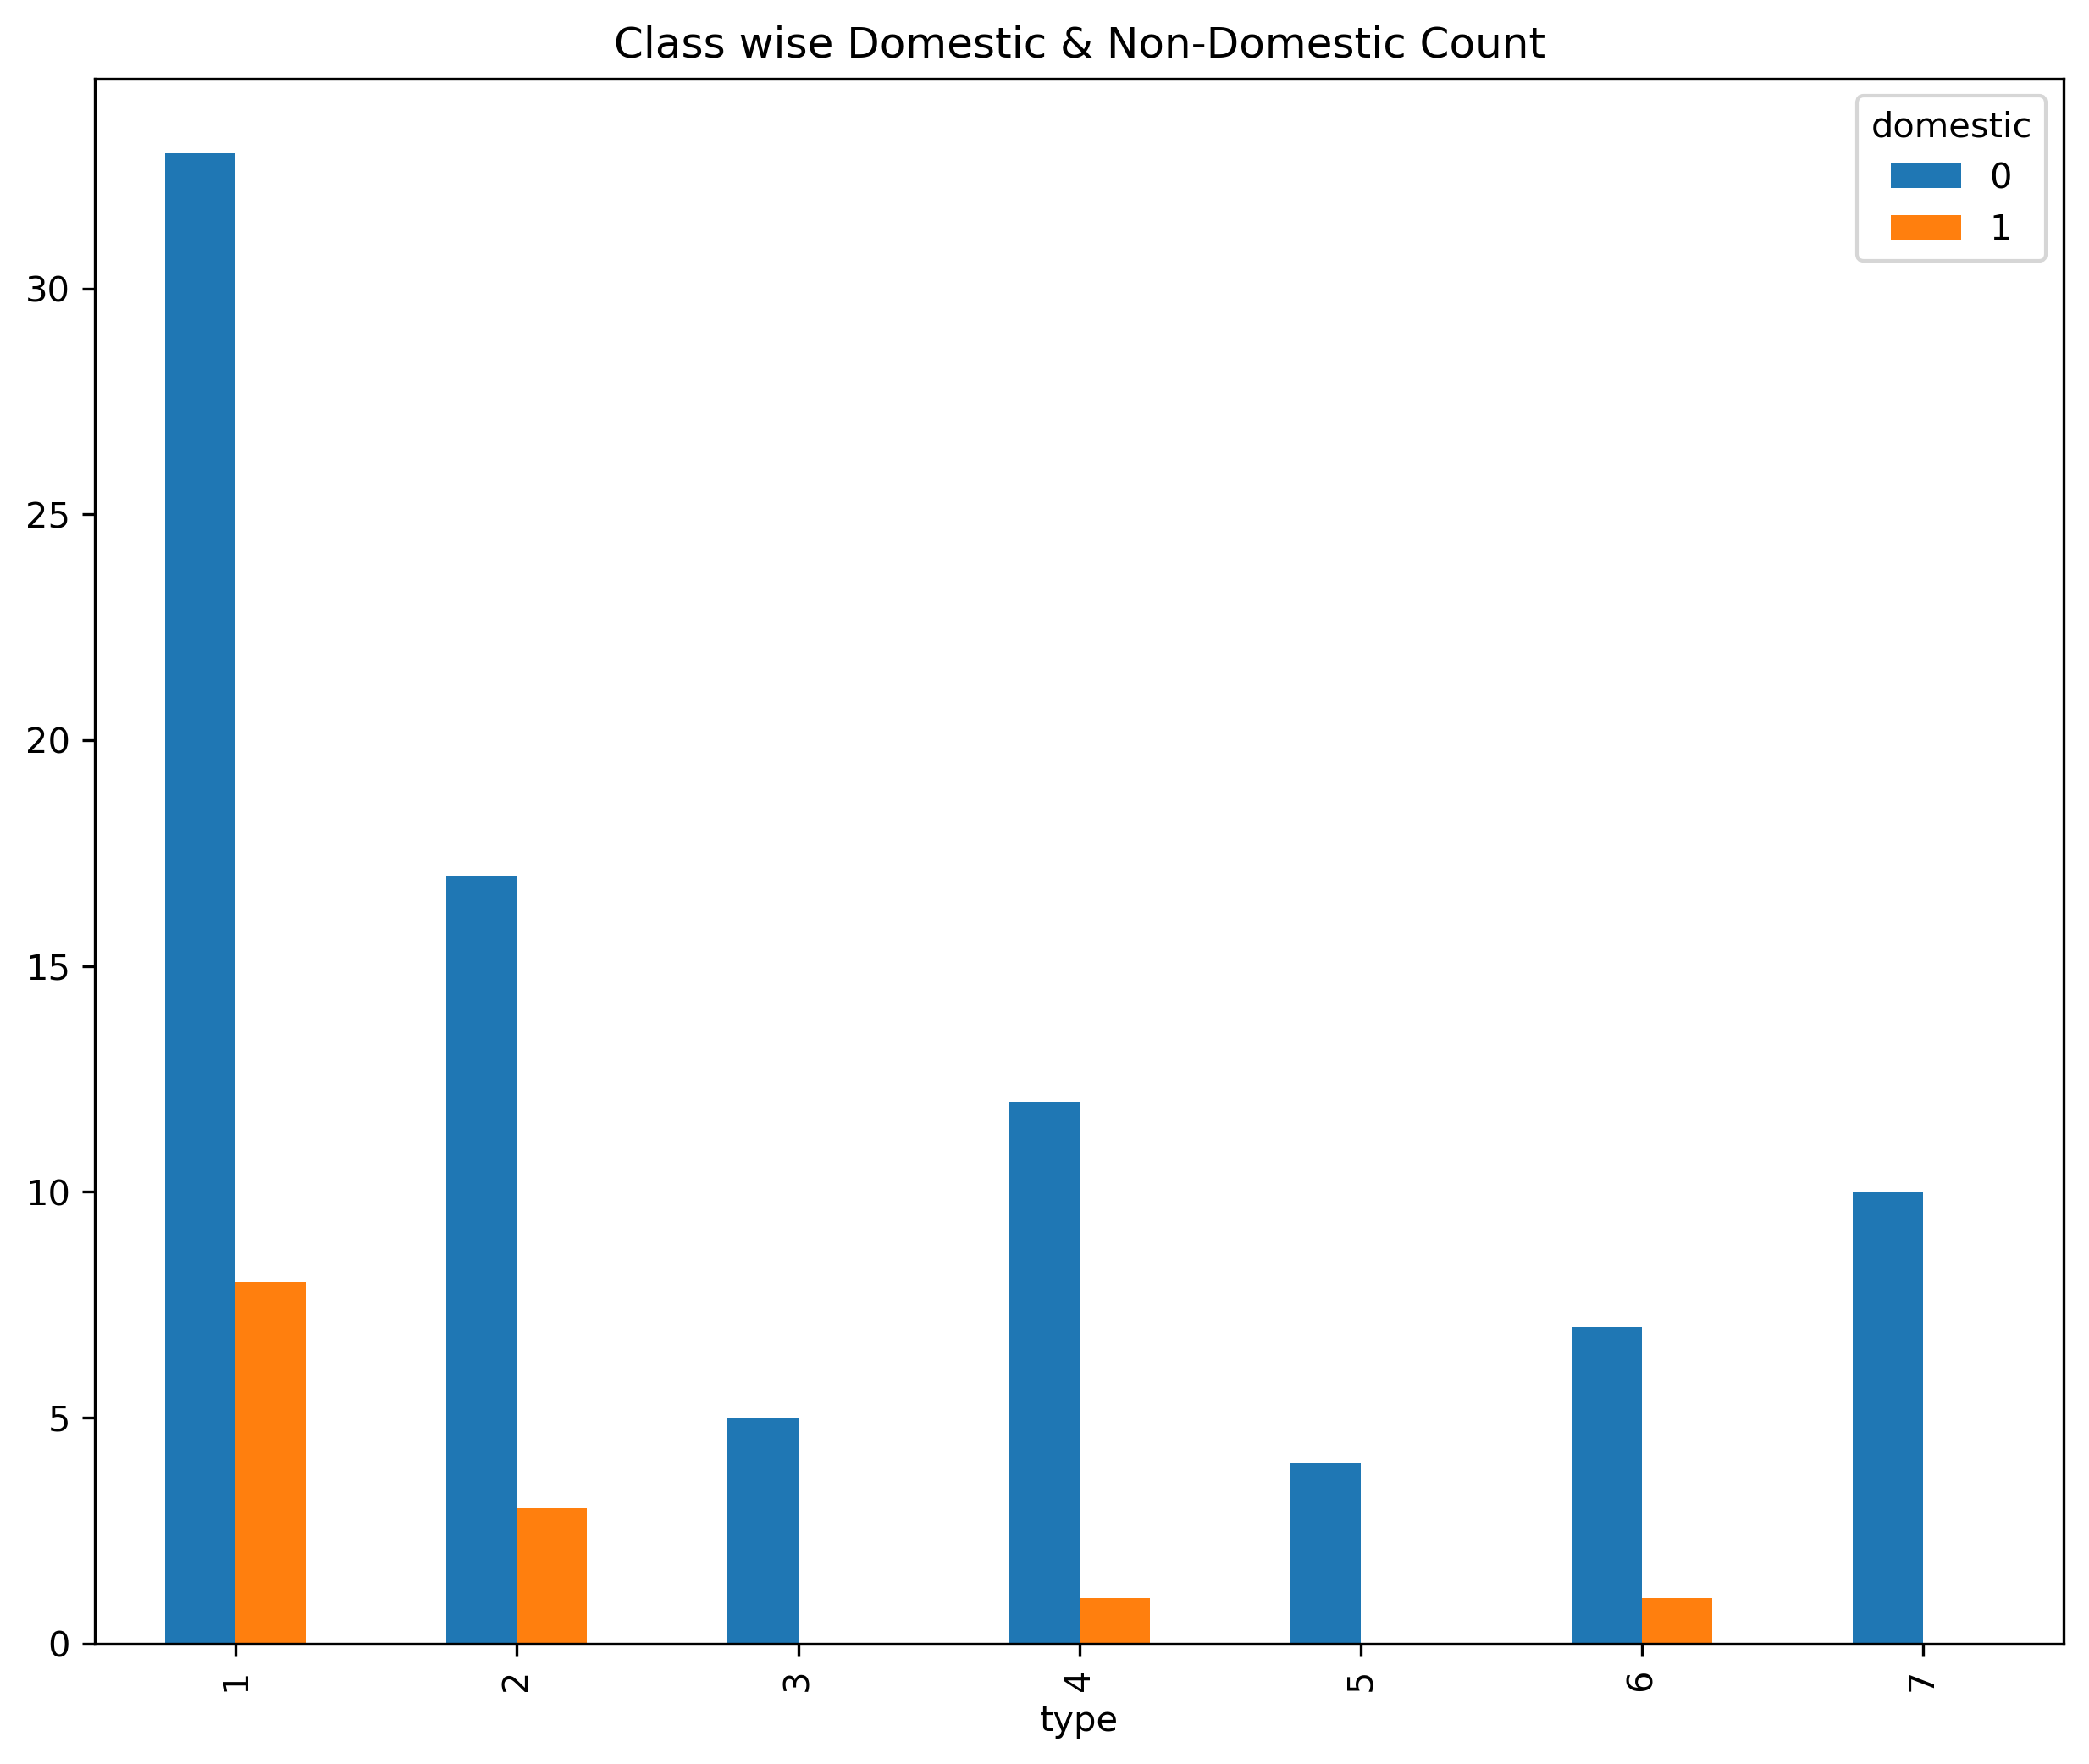

In [17]:
pd.crosstab(df['type'], df['domestic']).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

In [18]:
# finding Unique value of class_type
type_list = [i for i in df.type]
unique_type = list(set(type_list))
unique_type

[1, 2, 3, 4, 5, 6, 7]

In [20]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [21]:
# split train test data 

In [22]:
x=df.iloc[:,1:16]
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [23]:
y=df.iloc[:,16]
y

0      1
1      1
2      0
3      1
4      1
      ..
96     1
97     0
98     1
99     0
100    0
Name: catsize, Length: 101, dtype: int64

In [56]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [57]:
knn=KNeighborsClassifier(n_neighbors=4)

In [58]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [60]:
ypred=knn.predict(xtest)
ypred

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [61]:
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.7875, 0.7619047619047619)

In [62]:
# Hyperparameter Tuning

In [63]:
test_acc=[]
train_acc=[]

for i in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_acc.append(knn.score(xtrain,ytrain))
    test_acc.append(knn.score(xtest,ytest))

In [64]:
train_acc

[0.875,
 0.725,
 0.8375,
 0.7875,
 0.8125,
 0.7875,
 0.8,
 0.775,
 0.8,
 0.7875,
 0.7625,
 0.7375,
 0.75,
 0.7375,
 0.7375,
 0.7375,
 0.7375,
 0.7375,
 0.7375,
 0.7375,
 0.75,
 0.7375,
 0.7375,
 0.7375]

In [65]:
test_acc

[0.7142857142857143,
 0.7619047619047619,
 0.8095238095238095,
 0.7619047619047619,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.7142857142857143,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

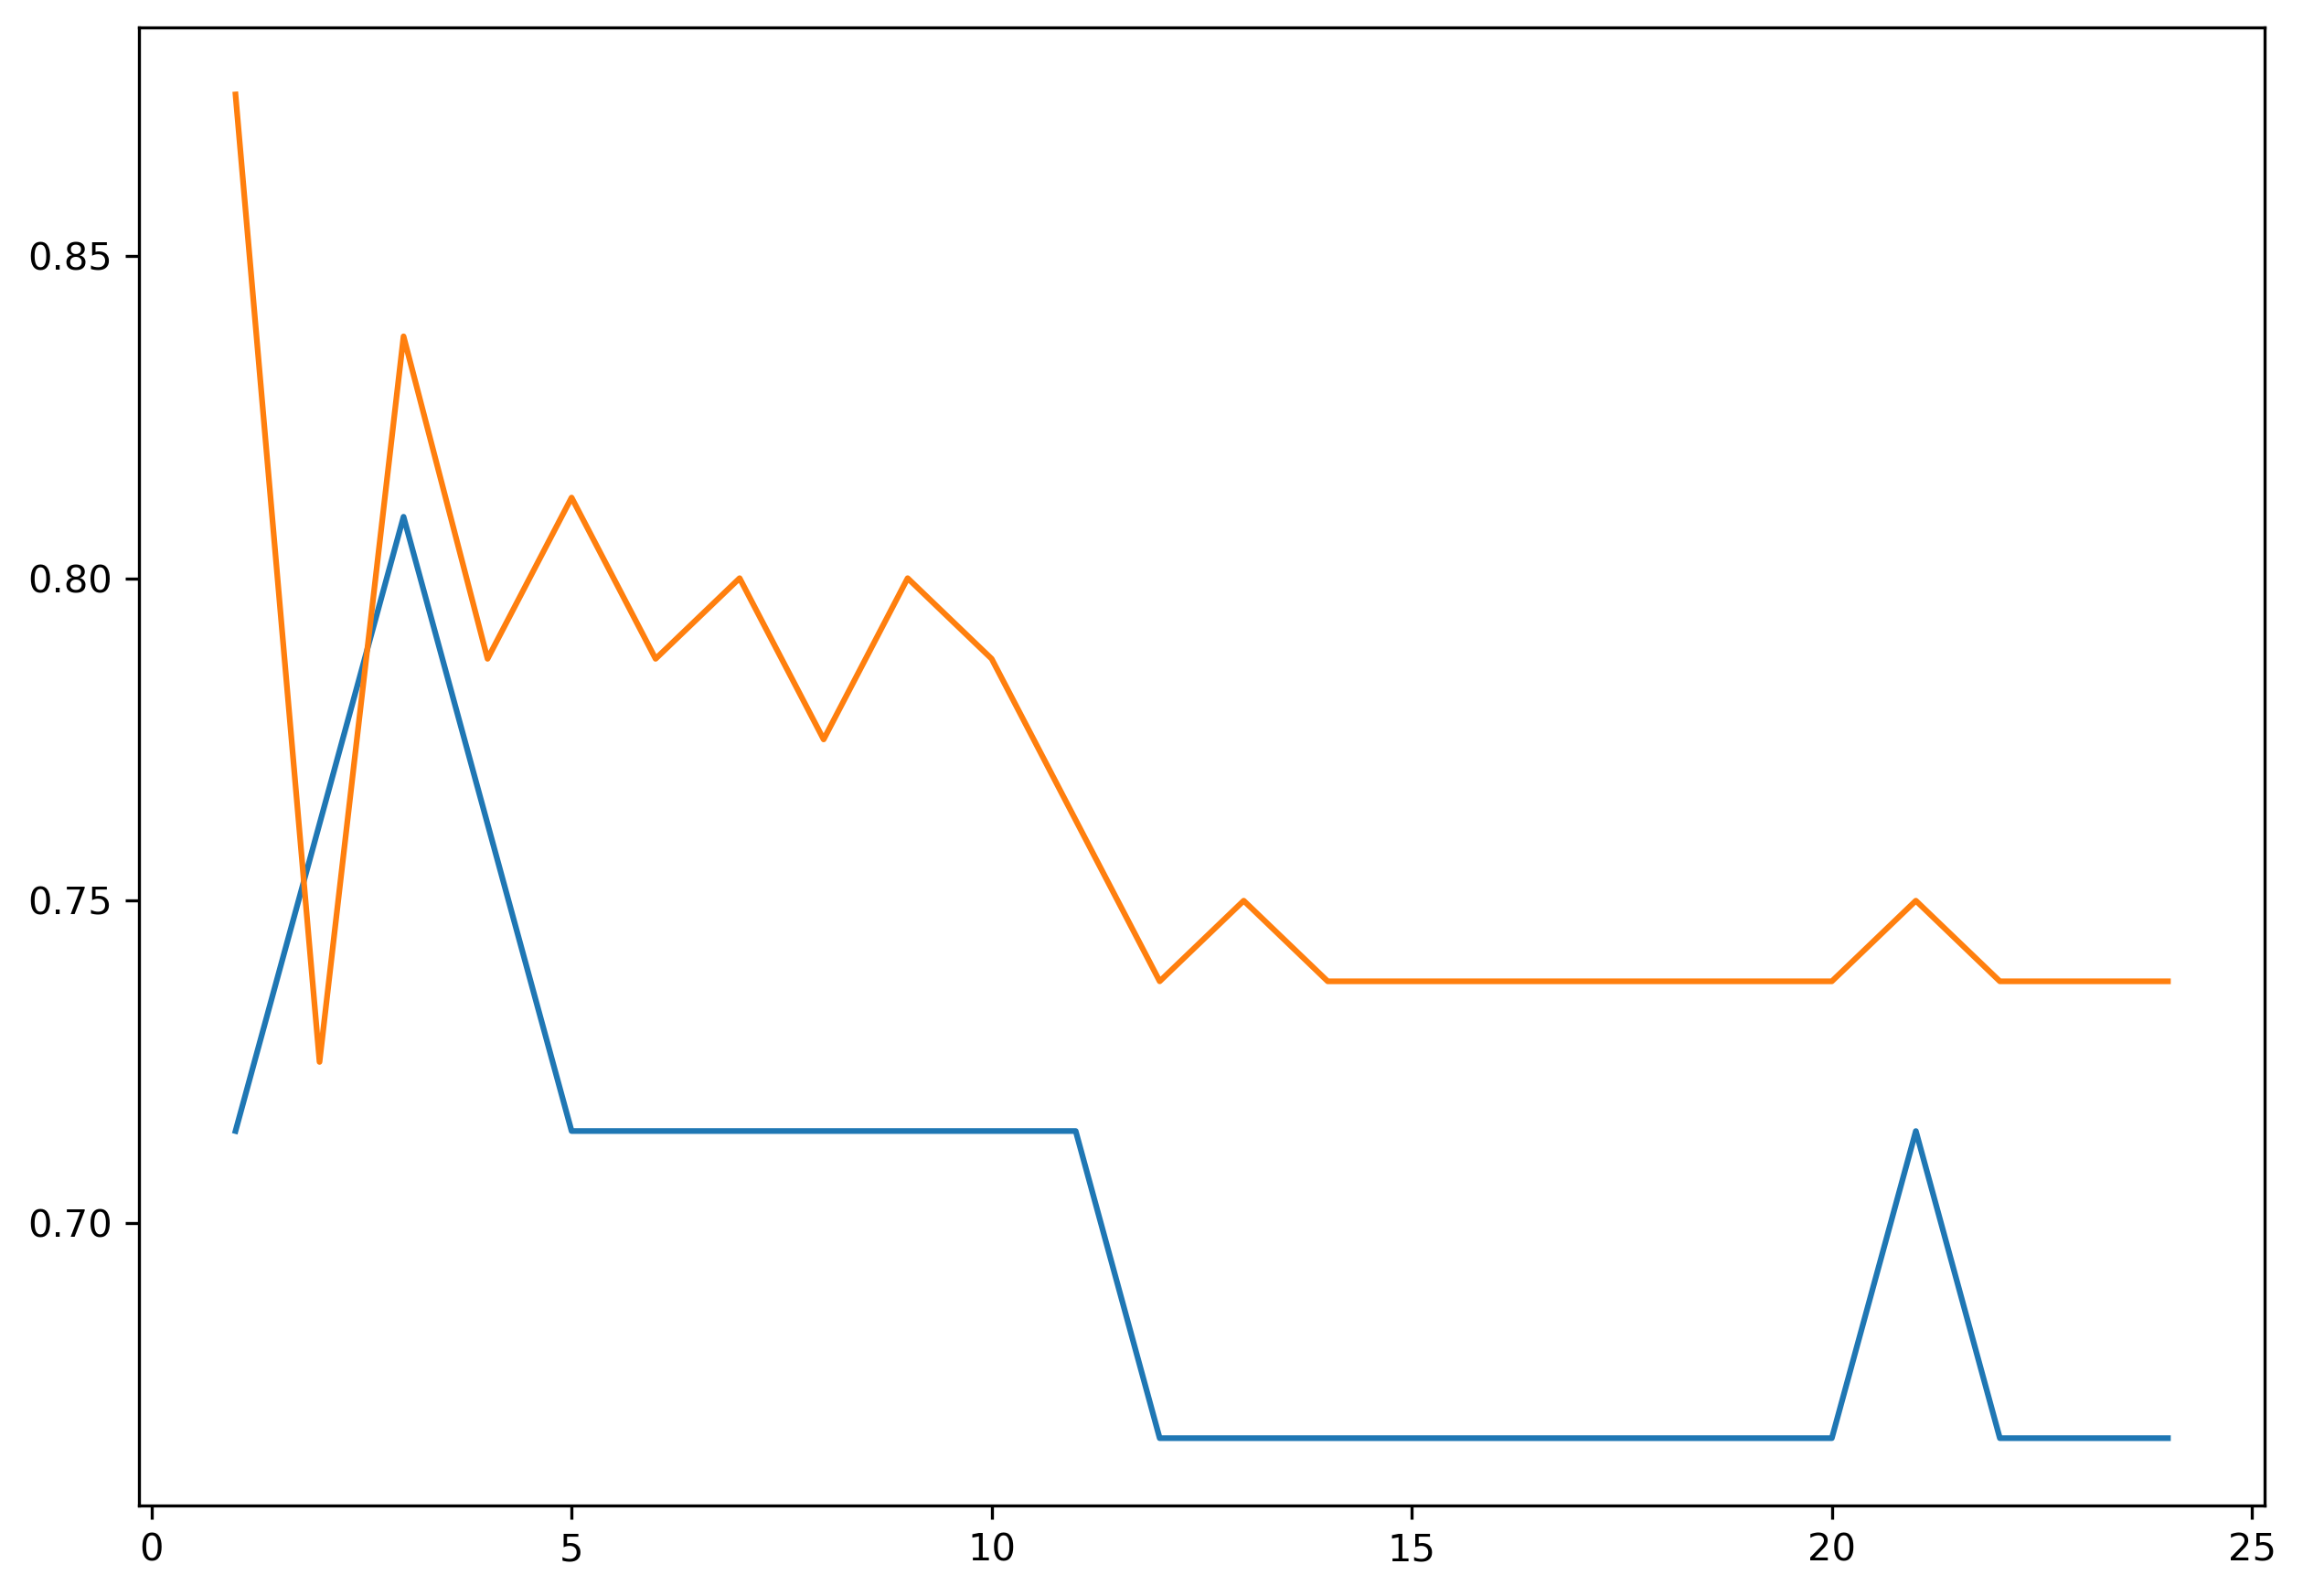

In [66]:
plt.plot(range(1,25),test_acc)
plt.plot(range(1,25),train_acc)

In [73]:
knn=KNeighborsClassifier(n_neighbors=4)

In [74]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [75]:
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.7875, 0.7619047619047619)

In [ ]:
Best accuracy is 0.7741935483870968 with K = 4